# Implementing Discrete-Time basic Hebb's Rule 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# For interactive plotting
from matplotlib.widgets import Slider, Button, RadioButtons

# For saving/loading data
import pickle

import hebbian_learning as hl 

## Importing data

In [2]:
# import lab_2_1_data.csv
import csv
import pandas as pd

# Load the data
data = pd.read_csv('lab2_1_data.csv', header=None)
data = data.T


## Discretizing Hebb's Rule

From
$$ 
\tau_w\frac{dw}{dn}=vu
$$

---

$$
\begin{align*}
\tau_w\Delta w(n) = v(n)u(n) \\
v(n) = w(n)^T u(n) \;\;\;\\
w(n+1) = w(n) + \Delta v(n) \\
\end{align*}
$$

# Showing data

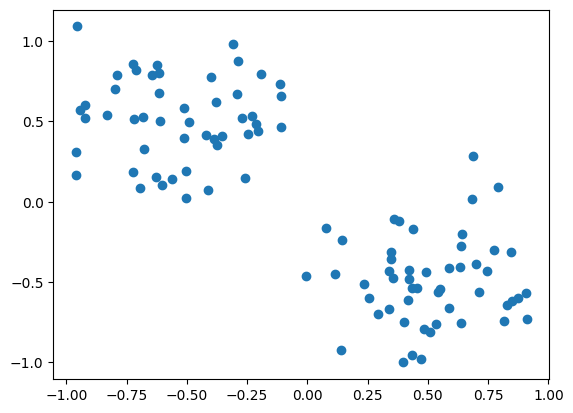

In [3]:
# plot data with scatteplot
plt.figure()
plt.plot(data[0], data[1], 'o')



# Basic Hebb's Rule

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100,)

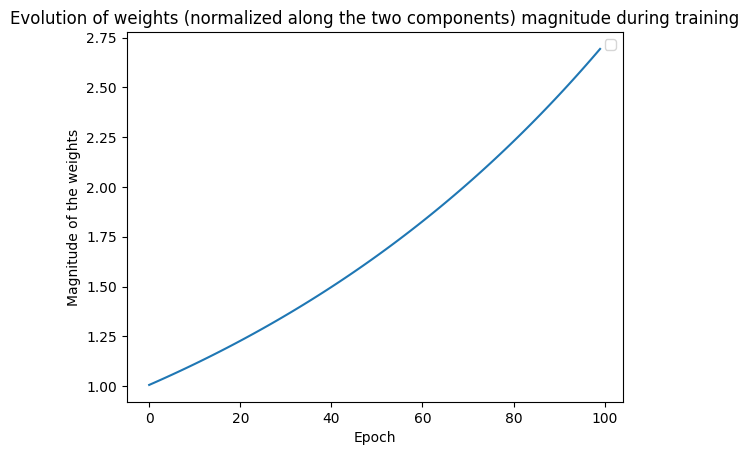

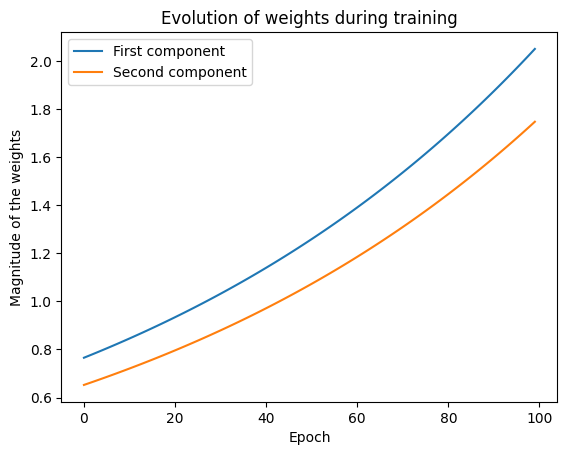

In [18]:
# Create a Hebbian learning rule object
hebb = hl.HebbianLearning(tau_w=0.1, eta=0.01, weights_dim=2)

# get data in input v and output u

v, u = data[0], data[1]

weights_history = hebb.train_hebbian_simple(data, epochs=100)

unnormalized_weights_magnitude = weights_history

# plot the weights magnitude
# First we compute the magnitude of the weights
weights_magnitude_normalized = np.linalg.norm(weights_history, axis=1)

# Normalized weights

plt.figure()
plt.title('Evolution of weights (normalized along the two components) magnitude during training')
plt.plot(weights_magnitude_normalized)
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')
plt.legend()

## Unnormalized weights
plt.figure()
plt.title('Evolution of weights during training')
plt.plot(unnormalized_weights_magnitude[:, 0], label='First component')
plt.plot(unnormalized_weights_magnitude[:, 1], label='Second component')
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')
plt.legend()

weights_magnitude_normalized.shape

# Oja's Rule

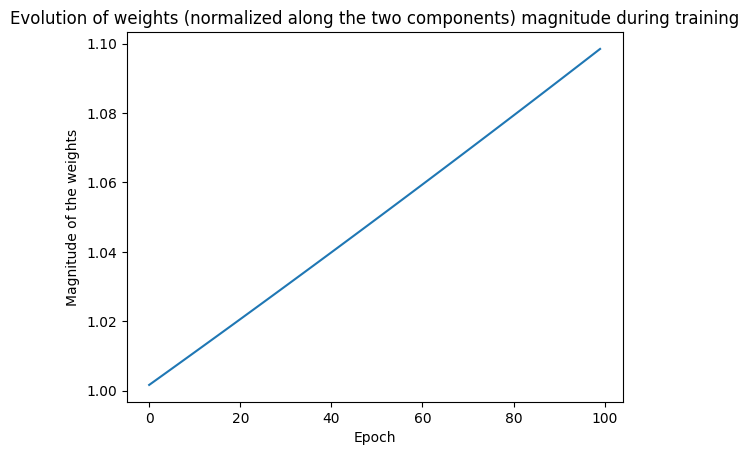

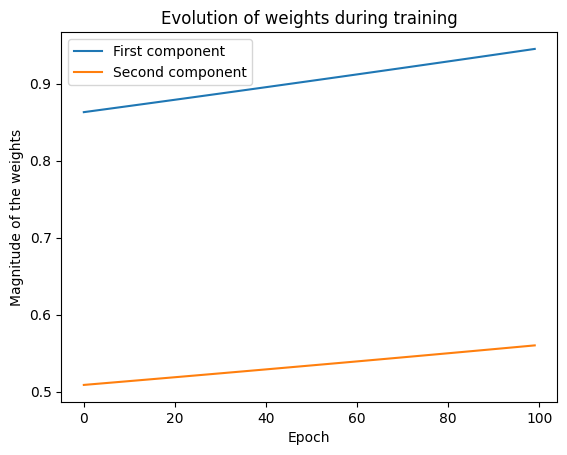

In [19]:
oja = hl.HebbianLearning(tau_w=0.1, eta=0.01, weights_dim=2)

weights_history_oja = oja.train_oja(data, epochs=100)

# plot the weights magnitude
# First we compute the magnitude of the weights
weights_magnitude_oja = np.linalg.norm(weights_history_oja, axis=1)


# Normalized weights
plt.figure()
plt.title('Evolution of weights (normalized along the two components) magnitude during training')
plt.plot(weights_magnitude_oja)
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')


# Unnormalized weights
plt.figure()
plt.title('Evolution of weights during training')
plt.plot(weights_history_oja[:, 0], label='First component')
plt.plot(weights_history_oja[:, 1], label='Second component')
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')
plt.legend()

# Subtractive Normalization

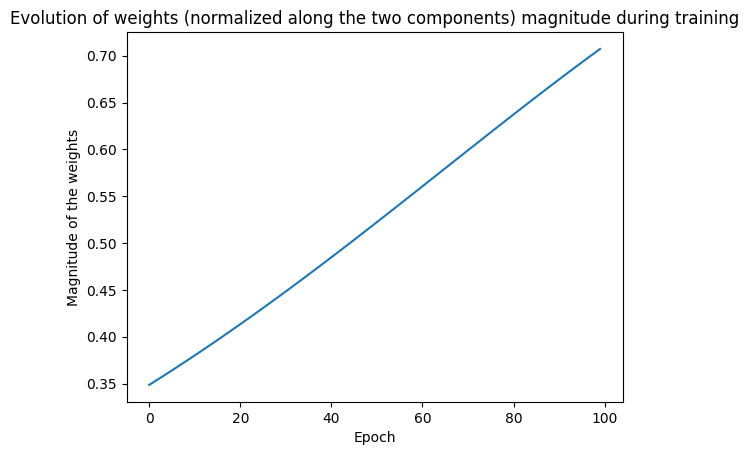

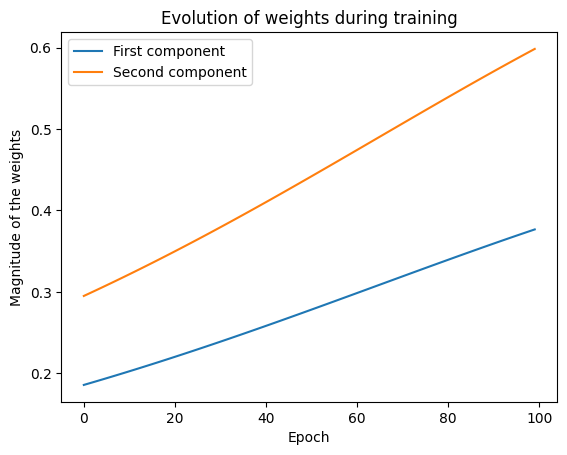

In [20]:
sub_norm = hl.HebbianLearning(tau_w=0.1, eta=0.01, weights_dim=2)

subtractive_normalization = sub_norm.train_subtractive_normalization(data, epochs=100)

# plot the weights magnitude
# First we compute the magnitude of the weights

weights_magnitude_sub = np.linalg.norm(subtractive_normalization, axis=1)

# Normalized weights
plt.figure()
plt.title('Evolution of weights (normalized along the two components) magnitude during training')
plt.plot(weights_magnitude_sub)
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')

# Unnormalized weights
plt.figure()
plt.title('Evolution of weights during training')
plt.plot(subtractive_normalization[:, 0], label='First component')
plt.plot(subtractive_normalization[:, 1], label='Second component')
plt.xlabel('Epoch')
plt.ylabel('Magnitude of the weights')
plt.legend()


### Showing Eigendecomposition and PCA of Standard Hebb's Rule

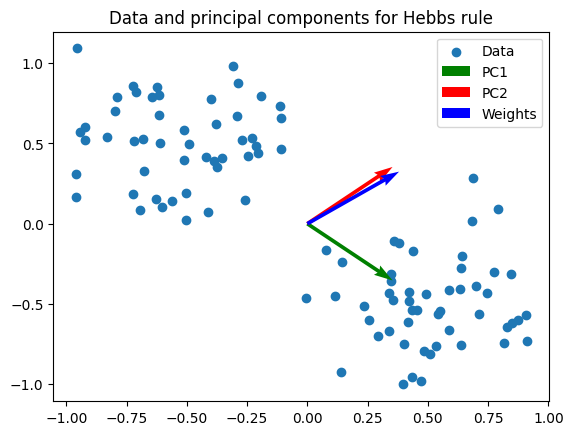

In [21]:
corr = np.corrcoef(data.T)

eig_values, eig_vectors = np.linalg.eig(corr)

plt.scatter(data[0], data[1])

#principal component
#plt.plot([0, eig_vectors[0,0]], [0, eig_vectors[1,0]], 'r')
#plt.plot([0, eig_vectors[0,1]], [0, eig_vectors[1,1]], 'r')

plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', scale_units='xy', scale=2, color='g')
plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', scale_units='xy', scale=2, color='r')

# add the standardized weights vector
weights_vector = weights_history[-1]

weights_vector = weights_vector / np.linalg.norm(weights_vector)

plt.quiver(0, 0, weights_vector[0], weights_vector[1], angles='xy', scale_units='xy', scale=2, color='b')
# legend
plt.title('Data and principal components for Hebbs rule')
plt.legend(['Data', 'PC1', 'PC2', 'Weights'])


plt.show()


### Showing Eigendecomposition and PCA of Oja's Rule


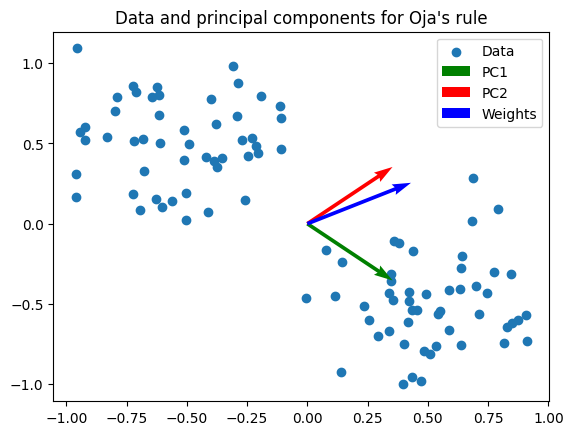

In [22]:
corr = np.corrcoef(data.T)

eig_values, eig_vectors = np.linalg.eig(corr)

plt.scatter(data[0], data[1])

#principal component
#plt.plot([0, eig_vectors[0,0]], [0, eig_vectors[1,0]], 'r')
#plt.plot([0, eig_vectors[0,1]], [0, eig_vectors[1,1]], 'r')

plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', scale_units='xy', scale=2, color='g')
plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', scale_units='xy', scale=2, color='r')

# add the standardized weights vector
weights_vector = weights_history_oja[-1]

weights_vector = weights_vector / np.linalg.norm(weights_vector)

plt.quiver(0, 0, weights_vector[0], weights_vector[1], angles='xy', scale_units='xy', scale=2, color='b')
# legend
plt.title('Data and principal components for Oja\'s rule')  
plt.legend(['Data', 'PC1', 'PC2', 'Weights'])




### Showing Eigendecomposition and PCA of Subtractive Normalization

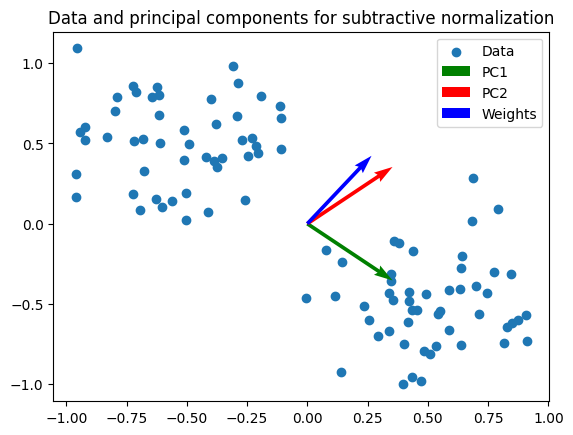

In [23]:
corr = np.corrcoef(data.T)

eig_values, eig_vectors = np.linalg.eig(corr)

plt.scatter(data[0], data[1])

plt.quiver(0, 0, eig_vectors[0,0], eig_vectors[1,0], angles='xy', scale_units='xy', scale=2, color='g')
plt.quiver(0, 0, eig_vectors[0,1], eig_vectors[1,1], angles='xy', scale_units='xy', scale=2, color='r')

# add the standardized weights vector
weights_vector = subtractive_normalization[-1]

weights_vector = weights_vector / np.linalg.norm(weights_vector)

plt.quiver(0, 0, weights_vector[0], weights_vector[1], angles='xy', scale_units='xy', scale=2, color='b')

plt.title('Data and principal components for subtractive normalization')
plt.legend(['Data', 'PC1', 'PC2', 'Weights'])
